#### Linear Discriminant Analysis (LDA) Examples

- LDA is a supervised dimensionality reduction technique primarily used to maximize class separability.

#### Example 1 (LDA): Dimensionality Reduction for Classification (Iris Dataset)

- This example shows how LDA can be used to reduce the dimensionality of the Iris dataset before training a classifier. Since Iris has 3 classes, LDA can reduce the features to at most 3−1=2 components.

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.multiclass import OneVsRestClassifier

In [2]:
# --- 1. Load Iris Dataset ---
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

X_df = pd.DataFrame(X, columns=feature_names)
print("Iris Dataset Loaded for LDA + Classification.")
print(f"Original features shape: {X_df.shape}") # 4 features
print(f"Number of classes: {len(np.unique(y))}") # 3 classes


Iris Dataset Loaded for LDA + Classification.
Original features shape: (150, 4)
Number of classes: 3


In [3]:
# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y, test_size=0.3, random_state=42, stratify=y
)

In [7]:
# --- 3. Model 1: Logistic Regression on Original (Scaled) Full Features ---
print("\n--- Model 1: Logistic Regression on Original Scaled Features ---")
pipe_full_features_lda_comp = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear', random_state=42))
])
pipe_full_features_lda_comp.fit(X_train, y_train)
y_pred_full_lda_comp = pipe_full_features_lda_comp.predict(X_test)
accuracy_full_lda_comp = accuracy_score(y_test, y_pred_full_lda_comp)
print(f"Accuracy with all {X_train.shape[1]} features: {accuracy_full_lda_comp:.4f}")



--- Model 1: Logistic Regression on Original Scaled Features ---
Accuracy with all 4 features: 0.8000


In [10]:
# --- 4. Model 2: Logistic Regression on LDA-transformed Features ---
# LDA can reduce to n_classes - 1 components. For Iris (3 classes), max is 2 components.
# If n_components is not set, it will be min(n_features, n_classes - 1).
print("\n--- Model 2: Logistic Regression on LDA-transformed Features ---")

# Create a pipeline with scaling, LDA, and logistic regression
# n_components for LDA can be at most min(n_features, n_classes - 1)
# For Iris, n_features=4, n_classes=3, so max n_components for LDA is 2.
lda_components = 2 # min(X_train.shape[1], len(np.unique(y_train)) - 1)

pipe_lda_features = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LDA(n_components=lda_components)),
    ('logreg', LogisticRegression(solver='liblinear', random_state=42))
])
pipe_lda_features.fit(X_train, y_train) # LDA uses y_train during its fit method
y_pred_lda = pipe_lda_features.predict(X_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

print(f"Accuracy with {lda_components} LDA components: {accuracy_lda:.4f}")
print("\nClassification Report (LDA Features):")
print(classification_report(y_test, y_pred_lda, target_names=target_names))


--- Model 2: Logistic Regression on LDA-transformed Features ---
Accuracy with 2 LDA components: 0.8000

Classification Report (LDA Features):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.75      0.60      0.67        15
   virginica       0.67      0.80      0.73        15

    accuracy                           0.80        45
   macro avg       0.81      0.80      0.80        45
weighted avg       0.81      0.80      0.80        45



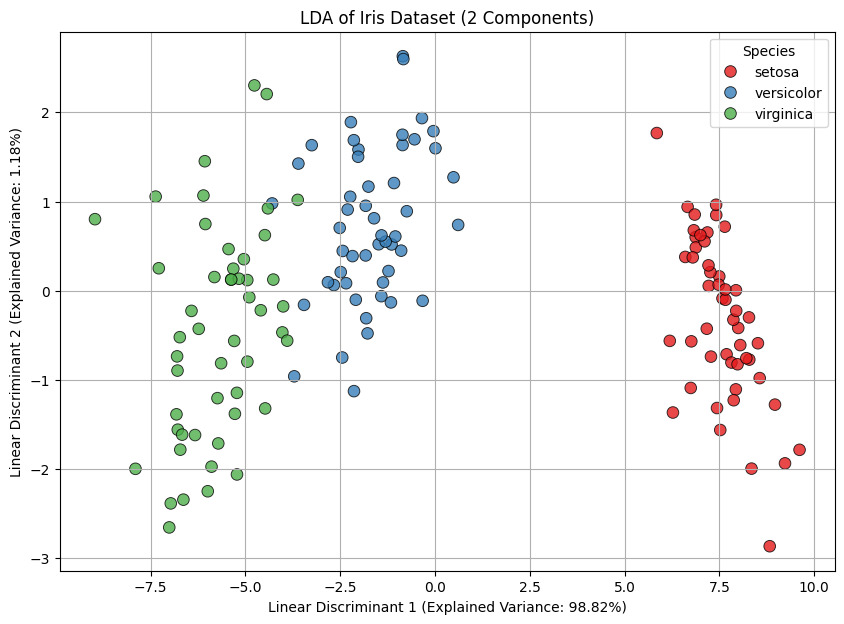


Explained variance ratio by LDA components:
[0.9881565 0.0118435]


In [11]:
# --- 5. Visualize the LDA-transformed Data (2D) ---
# To visualize, we fit scaler and LDA on the full dataset (or just training for consistency)
# Here, let's use the fitted LDA from the pipeline on the scaled full dataset for visualization
X_scaled_full = pipe_lda_features.named_steps['scaler'].transform(X_df)
X_lda_full = pipe_lda_features.named_steps['lda'].transform(X_scaled_full)

lda_df_vis = pd.DataFrame(data=X_lda_full, columns=[f'LD{i+1}' for i in range(lda_components)])
lda_df_vis['target'] = y
lda_df_vis['target_names'] = lda_df_vis['target'].apply(lambda x: target_names[x])

plt.figure(figsize=(10, 7))
sns.scatterplot(x='LD1', y='LD2', hue='target_names',
                palette=sns.color_palette("Set1", n_colors=len(target_names)),
                data=lda_df_vis, s=70, alpha=0.8, edgecolor='k')
plt.title(f'LDA of Iris Dataset ({lda_components} Components)')
plt.xlabel(f'Linear Discriminant 1 (Explained Variance: {pipe_lda_features.named_steps["lda"].explained_variance_ratio_[0]*100:.2f}%)')
if lda_components > 1:
    plt.ylabel(f'Linear Discriminant 2 (Explained Variance: {pipe_lda_features.named_steps["lda"].explained_variance_ratio_[1]*100:.2f}%)')
else:
    plt.yticks([]) # No y-axis if only 1 component
plt.legend(title='Species')
plt.grid(True)
plt.show()

print("\nExplained variance ratio by LDA components:")
print(pipe_lda_features.named_steps['lda'].explained_variance_ratio_)


**Discussion for LDA Classification Example:**

- Supervised Nature: Notice that LDA().fit(X_train_scaled, y_train) uses y_train. This is because LDA aims to find dimensions that maximize class separability.
- n_components: For LDA, the maximum number of components is min(n_features, n_classes - 1). For Iris (3 classes), this is 2.
- Performance: You might find that the accuracy using LDA-transformed features is comparable to using all features, but with a significantly reduced feature set. This is especially true if the original features are somewhat redundant for classification.
- Visualization: The 2D plot of the Linear Discriminants (LD1 vs. LD2) should show good separation between the Iris classes, as this is what LDA optimizes for. The explained_variance_ratio_ attribute of the fitted LDA object tells you how much of the inter-class variance is captured by each discriminant.


---
#### Example 2 (LDA): Comparing with PCA for Visualization (Wine Dataset)

- This example uses the Wine dataset (also 3 classes) to visually compare how LDA and PCA project the data for class separation.

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# --- 1. Load Wine Dataset ---
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names
target_names = wine.target_names # ['class_0', 'class_1', 'class_2']

X_df = pd.DataFrame(X, columns=feature_names)
print("Wine Dataset Loaded for LDA vs. PCA Visualization.")
print(f"Original features shape: {X_df.shape}") # 13 features
print(f"Number of classes: {len(np.unique(y))}") # 3 classes


Wine Dataset Loaded for LDA vs. PCA Visualization.
Original features shape: (178, 13)
Number of classes: 3


In [14]:
# --- 2. Standardize the Features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)
print("\nData Scaled.")


Data Scaled.


In [15]:
# --- 3. Apply PCA (reducing to 2 components for visualization) ---
pca_wine = PCA(n_components=2, random_state=42)
X_pca_wine = pca_wine.fit_transform(X_scaled)
print(f"\nPCA: Reduced to 2 components. Explained variance: {np.sum(pca_wine.explained_variance_ratio_):.4f}")



PCA: Reduced to 2 components. Explained variance: 0.5541


In [16]:
# --- 4. Apply LDA (reducing to 2 components as n_classes-1 = 2) ---
lda_wine = LDA(n_components=2)
# LDA's fit method requires y (class labels)
X_lda_wine = lda_wine.fit_transform(X_scaled, y)
print(f"LDA: Reduced to 2 components. Explained variance: {np.sum(lda_wine.explained_variance_ratio_):.4f}")

LDA: Reduced to 2 components. Explained variance: 1.0000


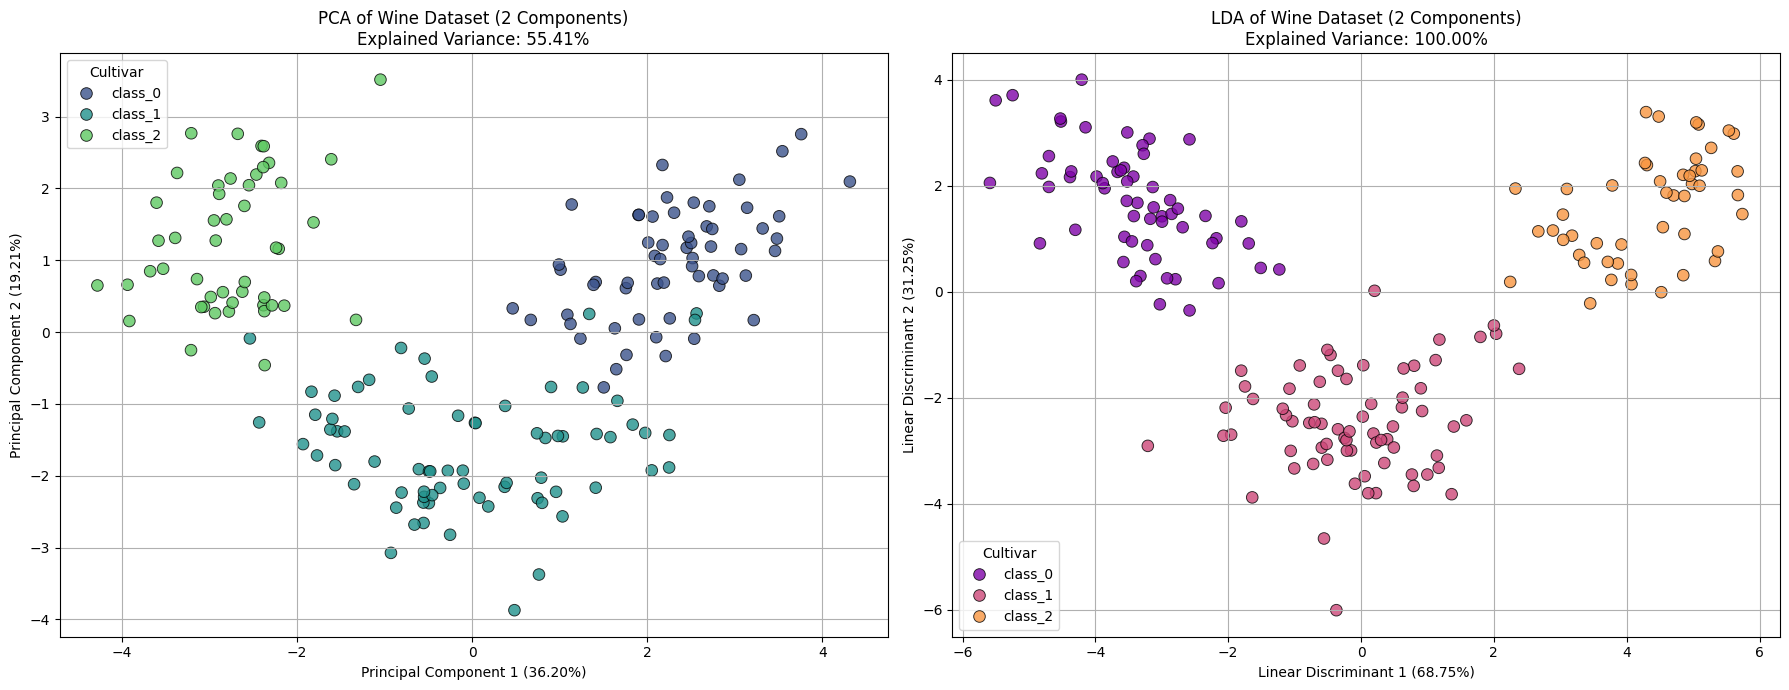

In [17]:
# --- 5. Visualize the Results ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# PCA Plot
pca_df_vis = pd.DataFrame(data=X_pca_wine, columns=['PC1', 'PC2'])
pca_df_vis['target'] = y
pca_df_vis['target_names'] = pca_df_vis['target'].apply(lambda x: target_names[x])

sns.scatterplot(x='PC1', y='PC2', hue='target_names',
                palette=sns.color_palette("viridis", n_colors=len(target_names)),
                data=pca_df_vis, s=70, alpha=0.8, edgecolor='k', ax=axes[0])
axes[0].set_title(f'PCA of Wine Dataset (2 Components)\nExplained Variance: {np.sum(pca_wine.explained_variance_ratio_)*100:.2f}%')
axes[0].set_xlabel(f'Principal Component 1 ({pca_wine.explained_variance_ratio_[0]*100:.2f}%)')
axes[0].set_ylabel(f'Principal Component 2 ({pca_wine.explained_variance_ratio_[1]*100:.2f}%)')
axes[0].legend(title='Cultivar')
axes[0].grid(True)

# LDA Plot
lda_df_vis = pd.DataFrame(data=X_lda_wine, columns=['LD1', 'LD2'])
lda_df_vis['target'] = y
lda_df_vis['target_names'] = lda_df_vis['target'].apply(lambda x: target_names[x])

sns.scatterplot(x='LD1', y='LD2', hue='target_names',
                palette=sns.color_palette("plasma", n_colors=len(target_names)),
                data=lda_df_vis, s=70, alpha=0.8, edgecolor='k', ax=axes[1])
axes[1].set_title(f'LDA of Wine Dataset (2 Components)\nExplained Variance: {np.sum(lda_wine.explained_variance_ratio_)*100:.2f}%')
axes[1].set_xlabel(f'Linear Discriminant 1 ({lda_wine.explained_variance_ratio_[0]*100:.2f}%)')
axes[1].set_ylabel(f'Linear Discriminant 2 ({lda_wine.explained_variance_ratio_[1]*100:.2f}%)')
axes[1].legend(title='Cultivar')
axes[1].grid(True)

plt.tight_layout()
plt.show()


**Discussion for LDA vs. PCA Visualization Example:**

- Different Projections: You will likely see that the LDA projection separates the three wine classes more distinctly in the 2D space compared to the PCA projection.
- Objective: This is because PCA finds axes that maximize overall variance (ignoring class labels), while LDA explicitly finds axes that maximize the separation between the means of the classes relative to their within-class scatter.
  Explained Variance: The "explained variance ratio" in LDA refers to how much of the between-class variance is captured by each linear discriminant.

---
#### Example 3 (LDA): Breast Cancer Dataset - Reducing to 1 Component for Binary Classification

- The Breast Cancer dataset has 30 features and two classes (malignant, benign). Since LDA can produce at most c−1 components (where c is the number of classes), for binary classification, it will produce only 1 Linear Discriminant. We can visualize the distribution of the data along this single discriminant.

In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# --- 1. Load Breast Cancer Dataset ---
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names # ['malignant' 'benign']

X_df = pd.DataFrame(X, columns=feature_names)
print("Breast Cancer Dataset Loaded for LDA.")
print(f"Original features shape: {X_df.shape}") # 30 features
print(f"Number of classes: {len(np.unique(y))}") # 2 classes


Breast Cancer Dataset Loaded for LDA.
Original features shape: (569, 30)
Number of classes: 2


In [20]:
# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y, test_size=0.3, random_state=42, stratify=y
)

In [21]:
# --- 3. Standardize the Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nData Scaled.")



Data Scaled.


In [22]:
# --- 4. Apply LDA (reducing to 1 component) ---
# For binary classification, n_components can be at most 1.
# If n_components is not set, it defaults to min(n_features, n_classes - 1)
lda_cancer = LDA(n_components=1)
X_train_lda = lda_cancer.fit_transform(X_train_scaled, y_train) # LDA uses y_train during fit
X_test_lda = lda_cancer.transform(X_test_scaled)

print(f"\nLDA: Reduced to {X_train_lda.shape[1]} component(s).")
print(f"Shape of transformed training data: {X_train_lda.shape}")
print(f"Explained variance ratio by LD1: {lda_cancer.explained_variance_ratio_[0]:.4f}")



LDA: Reduced to 1 component(s).
Shape of transformed training data: (398, 1)
Explained variance ratio by LD1: 1.0000


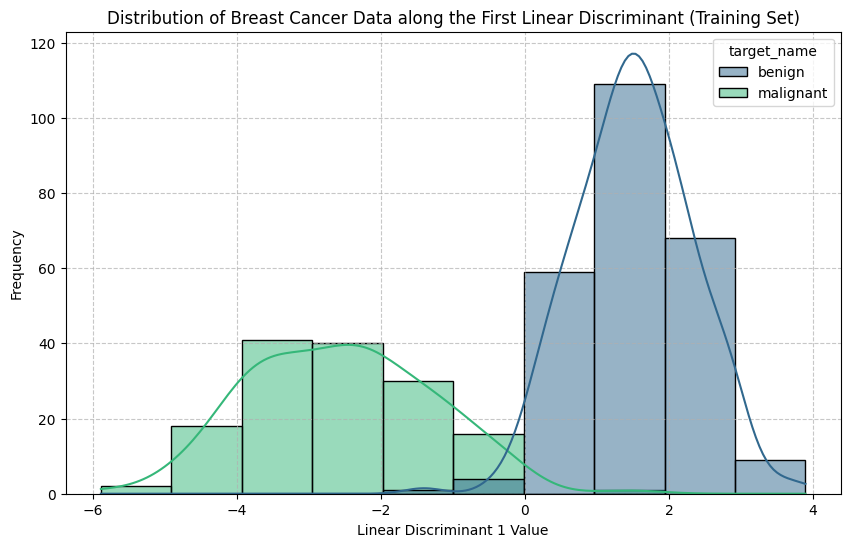

In [23]:
# --- 5. Visualize the Distribution along the Linear Discriminant ---
lda_train_df = pd.DataFrame(data=X_train_lda, columns=['LD1'])
lda_train_df['target'] = y_train
lda_train_df['target_name'] = lda_train_df['target'].apply(lambda x: target_names[x])

plt.figure(figsize=(10, 6))
sns.histplot(data=lda_train_df, x='LD1', hue='target_name', kde=True, palette="viridis")
plt.title('Distribution of Breast Cancer Data along the First Linear Discriminant (Training Set)')
plt.xlabel('Linear Discriminant 1 Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [24]:
# --- 6. Classification with LDA-transformed features ---
print("\n--- Logistic Regression on 1 LDA component ---")
log_reg_lda = LogisticRegression(solver='liblinear', random_state=42)
log_reg_lda.fit(X_train_lda, y_train)
y_pred_lda_clf = log_reg_lda.predict(X_test_lda)
accuracy_lda_clf = accuracy_score(y_test, y_pred_lda_clf)
print(f"Accuracy with 1 LDA component: {accuracy_lda_clf:.4f}")

# For comparison: Logistic Regression on all scaled features
log_reg_full = LogisticRegression(solver='liblinear', random_state=42)
log_reg_full.fit(X_train_scaled, y_train)
y_pred_full_clf = log_reg_full.predict(X_test_scaled)
accuracy_full_clf = accuracy_score(y_test, y_pred_full_clf)
print(f"Accuracy with all {X_train_scaled.shape[1]} scaled features: {accuracy_full_clf:.4f}")



--- Logistic Regression on 1 LDA component ---
Accuracy with 1 LDA component: 0.9649
Accuracy with all 30 scaled features: 0.9883


**Discussion for LDA Breast Cancer Example:**

- 1D Projection: LDA reduces the 30 features to a single dimension that best separates the 'malignant' and 'benign' classes.
Visualization: The histogram (or density plot) shows the distribution of the training samples along this single Linear Discriminant. Ideally, you'll see two somewhat separated distributions corresponding to the two classes.
- Classification Performance: The accuracy of a Logistic Regression classifier trained on this single LDA component is compared to one trained on all original (scaled) features. LDA aims to preserve class separability, so even with significant dimensionality reduction, classification performance can remain high.